In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Now, Let us import the dataset

data=pd.read_csv("/content/drive/MyDrive/paysim/paysimdataset.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# let us create another dataset
data1=data

In [5]:
data1.info()
#data1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Descriptive statistics
data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,399.000,4.900000e+02,6.810000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,365423.309,5.186342e+05,1.615979e+06,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,1822508.289,5.823702e+06,1.602726e+07,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,1970344.793,5.980262e+06,1.617616e+07,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,2914266.669,5.147230e+06,1.237182e+07,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3194869.671,5.515716e+06,1.313787e+07,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,1.000000e+00


In [7]:
### Finding Missing values or NaN values

#data1.isnull().sum()
data1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data1.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
# Let's turn non-numerical values into numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data1 = data1.apply(label_encoder.fit_transform)



'''for label, content in data1.items():
    if not pd.api.types.is_numeric_dtype(content):
        data1[label] = pd.Categorical(content).codes+1

data1.head(10)'''


'''### Converting useful categorical data into numeric data by creating dummies

dummy_type=pd.get_dummies(data1['type'])
dummy_type.info()

data1=pd.concat([data2,dummy_type],axis=1)

data1.head(10)'''

"### Converting useful categorical data into numeric data by creating dummies\n\ndummy_type=pd.get_dummies(data1['type'])\ndummy_type.info()\n\ndata1=pd.concat([data2,dummy_type],axis=1)\n\ndata1.head(10)"

In [10]:
data1.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,3,710400,757869,587897,1157557,1662094,0,0,0,0
1,0,3,141767,2188998,140919,336044,1733924,0,0,0,0
2,0,4,13666,1002156,1672,0,439685,0,0,1,0
3,0,1,13666,5828262,1672,0,391696,82843,0,1,0
4,0,3,822964,3445981,230032,456430,828919,0,0,0,0
5,0,3,576823,6026525,276798,599444,2247218,0,0,0,0
6,0,3,527683,1805947,613186,1208464,2063363,0,0,0,0
7,0,3,579814,2999171,599250,1183430,2314008,0,0,0,0
8,0,3,304861,869140,20694,0,768940,0,0,0,0
9,0,2,401807,5407276,230701,515728,282960,155355,127382,0,0


In [11]:
from scipy import stats

In [12]:
z = np.abs(stats.zscore(data1[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]))
print(z)

[[1.05558375 0.51496504 0.70598773 0.86656928 0.93331786]
 [1.4133344  0.39656776 0.28287818 0.86656928 0.93331786]
 [1.49392806 0.68053745 0.68737872 0.86656928 0.93331786]
 ...
 [1.83899018 2.48804532 0.68737872 0.6623277  1.86823662]
 [1.74442895 1.52842527 0.68737872 0.86656928 0.93331786]
 [1.74442895 1.52842527 0.68737872 1.97912021 1.90662749]]


In [13]:
threshold = 3
print(np.where(z > 3))

(array([  19097,   19098,   19099, ..., 6362576, 6362578, 6362580]), array([1, 1, 1, ..., 1, 1, 1]))


In [14]:
print(z[84][4])


2.039181340010523


In [15]:
data_new = data1[(z < 3).all(axis=1)]

In [16]:
data1.shape

(6362620, 11)

In [17]:
data_new.shape

(6323230, 11)

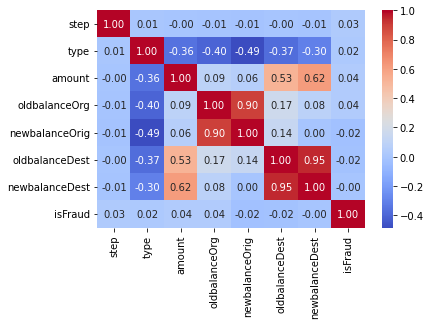

In [18]:
corrMatrix = sns.heatmap(data_new[['step', 'type', 'amount', 'oldbalanceOrg', \
    'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [19]:
'''plt.figure(figsize=(10, 8))
sns.boxplot(x="amount", y="type", data=data_new)
plt.xlabel("Quant transactions", size=14)
plt.ylabel("Type transactions", size=14)
plt.title("Fraud detection - Outlayers of transactions", size=18)
plt.savefig("simple_boxplot_with_Seaborn_boxplot_Python.png")
plt.show()
# Here we see that 'CasH_OUT, & 'TRANSFER' are kinds of outlayers.
'''

'plt.figure(figsize=(10, 8))\nsns.boxplot(x="amount", y="type", data=data_new)\nplt.xlabel("Quant transactions", size=14)\nplt.ylabel("Type transactions", size=14)\nplt.title("Fraud detection - Outlayers of transactions", size=18)\nplt.savefig("simple_boxplot_with_Seaborn_boxplot_Python.png")\nplt.show()\n# Here we see that \'CasH_OUT, & \'TRANSFER\' are kinds of outlayers.\n'

In [20]:
from sklearn.model_selection import train_test_split
x = data_new.drop('isFraud', axis=1)
y = data_new['isFraud']

#x = data2[['step','amount','newbalanceOrig','newbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
#y = data2["isFraud"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)


In [21]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [33]:
# instantiating the model
clf = LogisticRegression()

# fitting the model with training data
clf.fit(X_train, Y_train)
ms=clf.score(X_train,Y_train)
print("clf_score::",ms)
# making predictions with test data
Y_pred = clf.predict(X_test)

# printing key metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:",metrics.f1_score(Y_test, Y_pred))




clf_score:: 0.9993195159526291
Accuracy: 0.9992872840831875
Precision: 0.8797886393659181
Recall: 0.5323741007194245
F1: 0.6633466135458167


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
# plotting a matrix of confusion
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# TN FP
# FN TP

array([[1894285,     182],
       [   1170,    1332]])

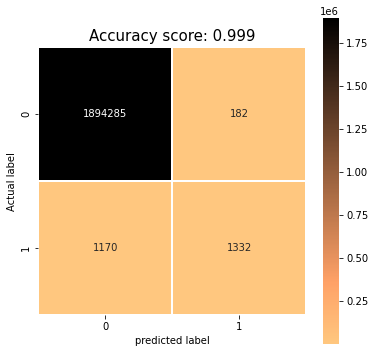

In [38]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize= (6,6))
sns.heatmap(cm, annot=True, fmt = ".0f", linewidths=.8, square = True, cmap = 'copper_r');
plt.ylabel('Actual label');
plt.xlabel('predicted label')

all_sample_title = 'Accuracy score: {:0.3f}'.format(ms)
plt.title(all_sample_title, size =15);

In [40]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1894467
           1       0.88      0.53      0.66      2502

    accuracy                           1.00   1896969
   macro avg       0.94      0.77      0.83   1896969
weighted avg       1.00      1.00      1.00   1896969



In [42]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LogisticRegression(), X_test,Y_test, scoring = 'accuracy', cv=10)
print(cross_val)

[0.99930415 0.9993516  0.99926725 0.99928834 0.99943594 0.99929361
 0.99924617 0.99920399 0.99932524 0.99924616]


In [ ]:
model = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SGD": SGDClassifier()}

def fit_and_evaluate(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates machine learning models.
    models: a dictionary with machine learning models to be used
    X_train: training data (no labels)
    X_test: testing data (no labels)
    Y_train: training labels
    Y_test: testing labels
    """
    # Create an empty dictionary for model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

model_scores = fit_and_evaluate(models = model,
                                X_train = X_train,
                                X_test = X_test,
                                Y_train = Y_train,
                                Y_test = Y_test)
model_scores

{'KNN': 0.9992600607385054,
 'Logistic Regression': 0.9994444982615258,
 'Random Forest': 0.9996694354186814,
 'SGD': 0.999379917763851}

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# importing the library
from sklearn import tree

# instantiating the model
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=100,min_samples_split=10)

# fitting the model with training data
clf = clf.fit(X_train, Y_train)

# making predictions with test data
Y_pred = clf.predict(X_test)

# printing key metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:",metrics.f1_score(Y_test, Y_pred))



Accuracy: 0.9996694354186814
Precision: 0.8631239935587761
Recall: 0.8216658150229944
F1: 0.8418848167539268


In [ ]:
# plotting a matrix of confusion
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# TN FP
# FN TP

array([[1824965,     255],
       [    349,    1608]])